<a href="https://colab.research.google.com/github/hameleon-ed/dx11-vvvv/blob/master/RL_Pacman_simple_game_Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pacman - simple RL game with Q-learning



## Setup Environment

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (AnnotationBbox, DrawingArea, OffsetImage, TextArea)
from IPython.display import display, clear_output

from IPython.display import clear_output #cler print output
from scipy.signal import savgol_filter  # For Savitzky-Golay filter
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import datetime # To get current date informaton
import os # For oerate with Google Drive folders and files

## Setup Game Functions

In [ ]:
# @title Function to play all possible games with the Q-table { vertical-output: true, form-width: "320px" }
def f_playEpisode(Q_sel, pr=False, pl=False, sh=True, save=False):

    games = len(num_possible)
    r_full_episode = 0
    num_infinity = 0
    r_full_list = []

    file_path_list = []

    for g in range(games):

        s = num_possible[g] # initial states
        init_s = s.copy()
        #print('Intital state: ', init_s)

        l = 0
        R_g = R_init.copy()
        r_game = 0
        states = []

        NUMTRANS = 30
        while True:

            states.append(s)

            sij = find_pos_by_value(num_board,s) # find position in board
            si = sij[0] # i of current position
            sj = sij[1] # j of current position
            idx = np.where(num_target_board[si,sj,:] == -1, False, True)
            possible_Q = Q_sel[si,sj,idx]
            j = possible_Q.argmax()
            possible_k = np.arange(ACTIONNUMBER)[idx]
            k = possible_k[j] # target state numbe
            t = num_target_board[si,sj,k]

            r_im = R_g[si,sj,k] # Immediate reward

            if p == True:
              print('Step: ',l, '\tAccumulated reward:', r_game, '\tImmediate reward:', r_im,  '\tState:', s,  '\tSyeps: ', states)

            if s == terminalState or l > 20:
              if l > 20:
                num_infinity += 1
              break

            # If Pakistan goes through FOOD the reward becomes 0
            if R_g[si,sj,k] > 0: # reward more than zero
                R_g[si,sj,k] = reward_map.get(EMPTY) # change reward to

            r_game += r_im # incremental summaruze reward for the game.
            s = t
            l += 1

        r_full_list.append(r_game)
        r_full_episode += r_game

        if pr == True:
          print('Game: ', g,
                '\tGame Reward:', r_game,
                '\tEpisode Reward:',r_full_episode,
                '\tSteps: ',l,
                '\tState:', s,
                '\tStates in track: ', states,
                '\tReward ', r_full_list)

        # Draw game plot
        if pl == True:
          f_gameTrackDrawing(states, str(g))

          # Saving files
          if save == True:
            dpi = 150 # dpi for saving to files plots
            # Filename
            file_name = 'Game-track_E-' + str(SELCTEDDUMP) + '_S-' + str(g) + '_dpi-' + str(dpi) + '.png' # Filename
            #print(file_name)
            file_path = exp_full_folder_path + file_name
            # Save plots to file
            plt.savefig(file_path, dpi=dpi, bbox_inches='tight')
          file_path_list.append(file_path)

          # Show plot
          #plt.show()
          if sh == False:
            clear_output(wait=True)
            display(fig)

    return {'r_full_episode': r_full_episode, 'num_infinity': num_infinity, 'file_path_list': file_path_list, 'r_full_list': r_full_list}

print ("Done!")

Done!


##Setup Experiment Information

In [ ]:
# @title Setup experiment information { vertical-output: true, form-width: "480px" }

#@markdown #### Experiment number:
exp_num = 14 #@param {type:"integer", name:"Experiment number", desc:"Enter the desired experiment number."}
desired_length = 4  # Adjust as needed
exp_formated_number = f"{exp_num:0{desired_length}}"  # Zero-filled string formatting
#@markdown

#@markdown #### Google Drive work folder for experiments:
#@markdown ##### In this folder will be created a new folder for the current experiment
work_folder = 'PhD/Technion The Intelligent Place Laboratory/4 Research workflow/IPL RL research/Experiments/' #@param {}  # Zero-filled string formatting

if work_folder[-1] != '/':
    work_folder += '/'


# Get the current date as a datetime object
current_date = datetime.date.today()

# Format the date as YYYY-MM-DD using strftime()
formatted_date = current_date.strftime("%Y-%m-%d")

exp_folder =  exp_formated_number + '_' + formatted_date
exp_full_folder_path = '/content/drive/MyDrive/' + work_folder + exp_folder + '/'

if not os.path.exists(exp_full_folder_path):
    os.makedirs(exp_full_folder_path)
    status = '🪄 The folder created'
else:
    status = '👍🏻 The folder already exists'

print(f'Experiment number: {exp_num}',
      f'Data:_____________ {formatted_date}',
      f'Experiment folder: {exp_folder}',
      f'Full path:________ {exp_full_folder_path}',
      f'{status}', sep='\n')


Experiment number: 14
Data:_____________ 2024-01-10
Experiment folder: 0014_2024-01-10
Full path:________ /content/drive/MyDrive/PhD/Technion The Intelligent Place Laboratory/4 Research workflow/IPL RL research/Experiments/0014_2024-01-10/
🪄 The folder created


## Setup game board and rules

In [ ]:
# Define state values
EMPTY = 0
WALL  = 1
GHOST = 2
FOOD  = 3
EXIT  = 4

# Create a 5x5 board with initial states
board = np.array([
    [0, 3, 1, 1, 0, 2, 3, 0],
    [0, 0, 0, 2, 0, 0, 0, 0],
    [2, 0, 1, 0, 3, 0, 2, 0],
    [1, 0, 0, 0, 0, 3, 0, 0],
    [1, 0, 0, 4, 0, 2, 0, 0],
    [0, 0, 3, 0, 0, 0, 0, 0],
])

In [ ]:
p = 0
num_board = np.empty_like(board) #, dtype=object) # numbered board

for i in range(board.shape[0]):
    for j in range(board.shape[1]):
        num_board[i,j] = p
        p +=1
print(num_board)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]]


In [ ]:
# Define a dictionary that maps specific values to rewards in the game
reward_map = {
    EMPTY:  -1,
    WALL:   np.nan,
    GHOST:  -10,
    FOOD:   5,
    EXIT:   10
}
print(reward_map)

# Define a dictionary that maps specific values to corresponding colors
color_map = {  # possible collors https://matplotlib.org/stable/gallery/color/named_colors.html
    EMPTY:  "lightgray", # 0
    WALL:   "dimgrey",   # 1
    GHOST:  "salmon",    # 2
    FOOD:   "cyan",      # 3
    EXIT:   "green"      # 4
    }
print(color_map)

{0: -1, 1: nan, 2: -10, 3: 5, 4: 10}
{0: 'lightgray', 1: 'dimgrey', 2: 'salmon', 3: 'cyan', 4: 'green'}


In [ ]:
# Create reward board

reward_board = np.empty(board.shape)
reward_board[:] = np.nan

#print(reward_board)

for i in range(board.shape[0]):
    for j in range(board.shape[1]):
        reward_board[i, j] = reward_map.get(board[i, j])
print(board.shape)
print(reward_board)

(6, 8)
[[ -1.   5.  nan  nan  -1. -10.   5.  -1.]
 [ -1.  -1.  -1. -10.  -1.  -1.  -1.  -1.]
 [-10.  -1.  nan  -1.   5.  -1. -10.  -1.]
 [ nan  -1.  -1.  -1.  -1.   5.  -1.  -1.]
 [ nan  -1.  -1.  10.  -1. -10.  -1.  -1.]
 [ -1.  -1.   5.  -1.  -1.  -1.  -1.  -1.]]


## Q-Table setup

In [ ]:
# Q-table initializing

# Define the size of the Q-table

ACTIONNUMBER = 4 # Number of possible actions: Up, Down, Left, Right
q_table_size = (board.shape[0], board.shape[1], ACTIONNUMBER)

print('size of Q-table:', q_table_size)

# Initialize the Q-table with zeros
Q_init = np.empty(q_table_size) # use np.zeros to get table with zeros OR np.empty empty
Q_init[:] = np.nan #all cells of table are NaN

R_init = Q_init.copy() # Initial Reward table
#print(Q_init)

size of Q-table: (6, 8, 4)


In [ ]:
# --- Create the table with target state numbers match with Q-table structure and update possible values in Q-Table

# UP    = 0 = i-1, j
# DOWN  = 1 = i+1, j
# RIGHT = 2 = i, j+1
# LEFT  = 3 = i, j-1

num_target_board = np.empty(Q_init.shape) #, dtype=object)
#num_target_board[:] = np.nan
#num_target_board = num_target_board.astype(int)

q_value = 0

#print (num_target_board)

# test tables for each type of action UP, DOWN, LEFT, RIGTH
#num_target_board_up = np.empty_like(board, dtype=object)
#num_target_board_down = np.empty_like(board, dtype=object)
#num_target_board_right = np.empty_like(board, dtype=object)
#num_target_board_left = np.empty_like(board, dtype=object)

for i in range(Q_init.shape[0]):
    for j in range(Q_init.shape[1]):
        for k in range(Q_init.shape[2]):
            # UP
            if k == 0 and i-1 in range(0, board.shape[0]) and board[i-1, j] != WALL:
              new_num = num_board[i-1,j]
              r_value = reward_board[i-1,j]
              q_value = 0
            # DOWN
            elif k == 1 and i+1 in range(0, board.shape[0]) and board[i+1, j] != WALL:
              new_num = num_board[i+1,j]
              r_value = reward_board[i+1,j]
              q_value = 0
            # RIGHT
            elif k == 2 and j+1 in range(0, board.shape[1]) and board[i, j+1] != WALL:
              new_num = num_board[i,j+1]
              r_value = reward_board[i,j+1]
              q_value = 0
            # LEFT
            elif k == 3 and j-1 in range(0, board.shape[1]) and board[i, j-1] != WALL:
              new_num = num_board[i,j-1]
              r_value = reward_board[i,j-1]
              q_value = 0
            # False target states
            else:
              new_num = -1
              r_value = np.nan
              q_value = np.nan
            # Number of target state
            num_target_board[i,j,k] = new_num
            Q_init[i,j,k] = q_value
            R_init[i,j,k] = r_value


num_target_board = num_target_board.astype(int)
'''
# Test prints
print('board \n', board)
print('num_board \n', num_board))
print('UP \n' , num_target_board_up)
print('DOWN \n', num_target_board_down)
print('RIGHT \n', num_target_board_right)
print('LEFT \n,'num_target_board_left)
'''
print('num_target_board \n', num_target_board, '\n')
print('R-table \n', R_init)
print('Q-table \n', Q_init)

num_target_board 
 [[[-1  8  1 -1]
  [-1  9 -1  0]
  [-1 10 -1  1]
  [-1 11  4 -1]
  [-1 12  5 -1]
  [-1 13  6  4]
  [-1 14  7  5]
  [-1 15 -1  6]]

 [[ 0 16  9 -1]
  [ 1 17 10  8]
  [-1 -1 11  9]
  [-1 19 12 10]
  [ 4 20 13 11]
  [ 5 21 14 12]
  [ 6 22 15 13]
  [ 7 23 -1 14]]

 [[ 8 -1 17 -1]
  [ 9 25 -1 16]
  [10 26 19 17]
  [11 27 20 -1]
  [12 28 21 19]
  [13 29 22 20]
  [14 30 23 21]
  [15 31 -1 22]]

 [[16 -1 25 -1]
  [17 33 26 -1]
  [-1 34 27 25]
  [19 35 28 26]
  [20 36 29 27]
  [21 37 30 28]
  [22 38 31 29]
  [23 39 -1 30]]

 [[-1 40 33 -1]
  [25 41 34 -1]
  [26 42 35 33]
  [27 43 36 34]
  [28 44 37 35]
  [29 45 38 36]
  [30 46 39 37]
  [31 47 -1 38]]

 [[-1 -1 41 -1]
  [33 -1 42 40]
  [34 -1 43 41]
  [35 -1 44 42]
  [36 -1 45 43]
  [37 -1 46 44]
  [38 -1 47 45]
  [39 -1 -1 46]]] 

R-table 
 [[[ nan  -1.   5.  nan]
  [ nan  -1.  nan  -1.]
  [ nan  -1.  nan   5.]
  [ nan -10.  -1.  nan]
  [ nan  -1. -10.  nan]
  [ nan  -1.   5.  -1.]
  [ nan  -1.  -1. -10.]
  [ nan  -1.  nan   5

In [ ]:

# Function for finding position in double and tripple arrays by value
def find_pos_by_value(array,value):
  for i in range(array.shape[0]):
    for j in range(array.shape[1]):
      if len(array.shape) == 3:
        for k in range(array.shape[2]):
          if array[i,j,k] == value:
            return i,j,k
      else:
        if array[i,j] == value:
          return i,j
  return None  # Return None if not found

'''
# Test
ar = num_board
f = find_pos_by_value(num_target_board, 11)
#f2 = num_board(num_target_board, 15)
ar, f
'''

'\n# Test\nar = num_board\nf = find_pos_by_value(num_target_board, 11)\n#f2 = num_board(num_target_board, 15)\nar, f\n'

## Q-learning

In [ ]:
# @title Setup learning variables { vertical-output: true, form-width: "480px" }

#@markdown #### Number of episodes during learning:
MAXEPISODES = 3000 #@param {type:'integer'}
NUMSTATES = board.shape[0] * board.shape[1]
#@markdown

#@markdown #### Discount factor (Gamma):
#@markdown ##### The `0` will cause the agent to only value immediate rewards
gamma = 0.8 #@param {type:"number"}
#@markdown

#@markdown #### Exploitation choose possibility:
#@markdown ##### The initital rate. The `0` will cause to use only exploration, the `1` will cause to use only exploitation
expl_rate_init = 0.7 #@param {type:'numner'} # Explotation rate (1. -> only exlotation)
#@markdown ##### The type of growing duriing the learning period
expl_rate_type = 'linear growth' #@param ['static', 'linear growth']
#@markdown ##### If type is growth then it is maximum for Exploitation choose possibility
expl_rate_max = 0.95 #@param{type:'number', min:0, max:1}
#@markdown

terminalState = num_board[find_pos_by_value(board, EXIT)] # Set terminal state of the game: cell with Exit

num_possible = []

for i in range(board.shape[0]):
  for j in range(board.shape[1]):
    if board[i,j] == EMPTY:
      num_possible.append(num_board[i,j])

print('Number of states: ', NUMSTATES, '\nExit state: ', terminalState)
print('All possible numbers for Start: ', num_possible, '\nNumber of possible states', len(num_possible))

Number of states:  48 
Exit state:  35
All possible numbers for Start:  [0, 4, 7, 8, 9, 10, 12, 13, 14, 15, 17, 19, 21, 23, 25, 26, 27, 28, 30, 31, 33, 34, 36, 38, 39, 40, 41, 43, 44, 45, 46, 47] 
Number of possible states 32


In [ ]:
#@markdown ###Q-learning alogrythm

#@markdown Bellman Equation: $ Q_{new} = Q_{current} + alpha *  (R_{immediate} + gamma * MaxQ_{new} - Q_{current}) $

#@markdown [(Deep) Q-learning, Part1: basic introduction and implementation](https://medium.com/@qempsil0914/zero-to-one-deep-q-learning-part1-basic-introduction-and-implementation-bb7602b55a2c)

In [ ]:
# @title Run Q-Learning { vertical-output: true, form-width: "480px" }

r_list = []
episode_reward_list = []
Q = Q_init.copy()
Q_dump = Q_init.copy()
Q_dump = np.expand_dims(Q_dump, axis=0)

expl_rate_dump = []
r_full_episode_dump =[]
r_full_test_episode = 0
r_full_list_list = []

last_reward_list = []
num_infinity_list = []
num_infinity = 0

for l in range(MAXEPISODES):
  alpha = 1/(l+1) # alpha decrease during steps of an episode
  s = np.random.permutation(num_possible)[0] # set state randomly: it permut all numbers and pick number 0
  R = reward_board.copy()
  turn = 0
  episode_reward = 0
  infinity_numbers = 0

  # Choose betweeen 'linear growth' or 'static' type of expl_rate
  if expl_rate_type == 'static':
    expl_rate = expl_rate_init
  elif expl_rate_type == 'linear growth':
    expl_rate = expl_rate_init + (1-expl_rate_init) * l/MAXEPISODES  # Udate Explotation rate
    expl_rate = max (0, min(1, expl_rate, expl_rate_max))
  else:
    expl_rate = expl_rate_init

  while True:
    sij = find_pos_by_value(num_board,s) # find position in board
    si = sij[0] # i of start position
    sj = sij[1] # j of start position

    idx = np.where(num_target_board[si,sj,:] == -1, False, True)
    possible_Q = Q[si,sj,idx]
    j = possible_Q.argmax()
    possible_k = np.arange(ACTIONNUMBER)[idx]


    selectMax = np.where(np.random.rand() < expl_rate, True, False) # 50% chance to take random action (exloration vs explotation)

    if selectMax:
      k = possible_k[j] # Explotation: get target state number
    else:
      k = np.random.permutation(possible_k)[0] #Exloration: get random possible action

    t = num_target_board[si,sj,k]
    tij = find_pos_by_value(num_board,t) # find position in board for a target state
    ti, tj = tij[0] , tij[1] # i and j of for target state

    Q_current_list = Q[~np.isnan(Q)]
    Q_current_list = Q_current_list.flatten()

    #Update the Q-value for the current state-action pair using the Bellman equation:
    #Incorporates immediate reward (R[i,j]), discounted future reward (gamma * np.nanmax(Q[j,:])), and current Q-value. alpha controls the learning rate.

    Q[si,sj,k] = Q[si,sj,k] + alpha *  (R[ti,tj] + gamma * np.nanmax(Q[ti,tj,:]) - Q[si,sj,k])

    # Comopute R sqare statistic
    Q_target_list = Q[~np.isnan(Q)]
    Q_target_list = Q_target_list.flatten()
    correlation = np.corrcoef(Q_current_list, Q_target_list)[0, 1]
    r_squared = correlation ** 2
    r_list.append(r_squared)

    # Compute an episode immediate reward
    episode_reward += R[ti,tj]

    last_reward = R[ti,tj]

    turn += 1
    # Print immediate learning statisitic for each turn
    clear_output(wait=True)
    print(f'Episode number:_________________________________ {l}',
          f'Turn:___________________________________________ {turn}',
          f'Exploitation choice probability:________________ {expl_rate}',
          f'State:__________________________________________ {s} --> {t}',
          f'Immediate Reward:_______________________________ {R[ti,tj]}',
          f'New Q-value for current cell:___________________ {Q[si,sj,k]}',
          f'R square: current vs. new Q-table:______________ {r_squared}',
          f'Episode Reward (exploration and exploitation):__ {episode_reward}',
          f'Average reward for all possible starting states: {r_full_test_episode / len(num_possible)}',
          f'Numbers of infinity loops________________________{num_infinity}', sep='\n')

    # If Pakistan goes through FOOD the reward becomes 0
    if R[ti,tj] == reward_map.get(FOOD): # reward more than zero
      R[ti,tj] = reward_map.get(EMPTY) # change reward to

    if t == terminalState:
      break
    s = t

  # Compute tracks for all possible start states
  play_episode = f_playEpisode(Q)
  print(play_episode)
  r_full_test_episode, num_infinity, r_full_list = play_episode['r_full_episode'], play_episode['num_infinity'], play_episode['r_full_list']
  r_full_episode_dump.append(r_full_test_episode)
  num_infinity_list.append(num_infinity)
  r_full_list_list.append(r_full_list)
  #
  last_reward_list.append(last_reward)
  #
  episode_reward_list.append(episode_reward)
  expl_rate_dump.append(expl_rate)
  #
  Q_append = np.expand_dims(Q, axis=0)
  Q_dump = np.concatenate((Q_dump, Q_append))

Episode number:_________________________________ 2999
Turn:___________________________________________ 3
Exploitation choice probability:________________ 0.95
State:__________________________________________ 43 --> 35
Immediate Reward:_______________________________ 10.0
New Q-value for current cell:___________________ 8.880646957031487
R square: current vs. new Q-table:______________ 0.9999999999128126
Episode Reward (exploration and exploitation):__ 14.0
Average reward for all possible starting states: 5.59375
Numbers of infinity loops________________________5
{'r_full_episode': 179.0, 'num_infinity': 5, 'file_path_list': [], 'r_full_list': [-15.0, 10.0, 9.0, -15.0, 6.0, 5.0, 11.0, 12.0, -15.0, 10.0, 7.0, 9.0, 13.0, 11.0, 8.0, 9.0, 10.0, 9.0, 13.0, 12.0, 9.0, 10.0, 10.0, 12.0, -21.0, 13.0, 14.0, 10.0, 9.0, 8.0, 7.0, -21.0]}


In [ ]:
#@markdown ###Print final Q-Table
print(f'Q-table: \n\n{Q}')

Q-table: 

[[[            nan -1.33981802e+00 -1.04525143e+00             nan]
  [            nan -1.72839204e+00             nan -1.72839590e+00]
  [            nan  0.00000000e+00             nan  0.00000000e+00]
  [            nan  0.00000000e+00  0.00000000e+00             nan]
  [            nan -1.95682063e+00 -1.00389388e+01             nan]
  [            nan -1.80492208e+00 -1.02347341e+00 -9.94613029e-01]
  [            nan -2.17541527e+00 -2.17542622e+00 -1.01178561e+01]
  [            nan -1.86857600e+00             nan -1.74944641e+00]]

 [[-1.29577097e+00 -2.82486436e+00 -1.29582130e+00             nan]
  [-1.16887230e+00 -1.16882433e+00 -1.17856423e+00 -1.17632306e+00]
  [            nan             nan -2.58650505e+00 -1.35239133e+00]
  [            nan -9.92328313e-01 -4.32353410e-01 -2.59162305e-01]
  [-1.87548358e+00 -4.11314087e-01 -1.75094304e+00 -1.00065706e+01]
  [-1.00460820e+01 -1.23513731e+00 -1.65558847e+00 -1.86664617e+00]
  [-1.65079278e+00 -1.02218236e+01 

## Statistic of Learning

In [ ]:
#@markdown #### Save the plots into the Experient Folder
save = True #@param{type:'boolean'}

The plot is saved!


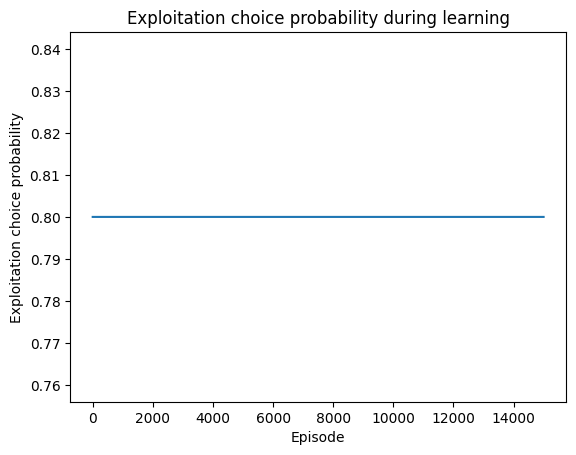

In [ ]:
# @title Exploitation choice probability during learning { vertical-output: true, form-width: "320px" }

plt.plot(expl_rate_dump)

plt.xlabel('Episode')
plt.ylabel('Exploitation choice probability')
title = 'Exploitation choice probability during learning'
plt.title(title)

# Saving files
if save == True:
  title = title.replace(" ", "-")
  dpi = 300 # dpi for saving to files plots
  # Filename
  file_name = 'stat_' + title + '_dpi-' + str(dpi) + '.png' # Filename
  #print(file_name)
  file_path = exp_full_folder_path + file_name
  # Save plots to file
  plt.savefig(file_path, dpi=dpi, bbox_inches='tight')
  print('The plot is saved!')

The plot is saved!


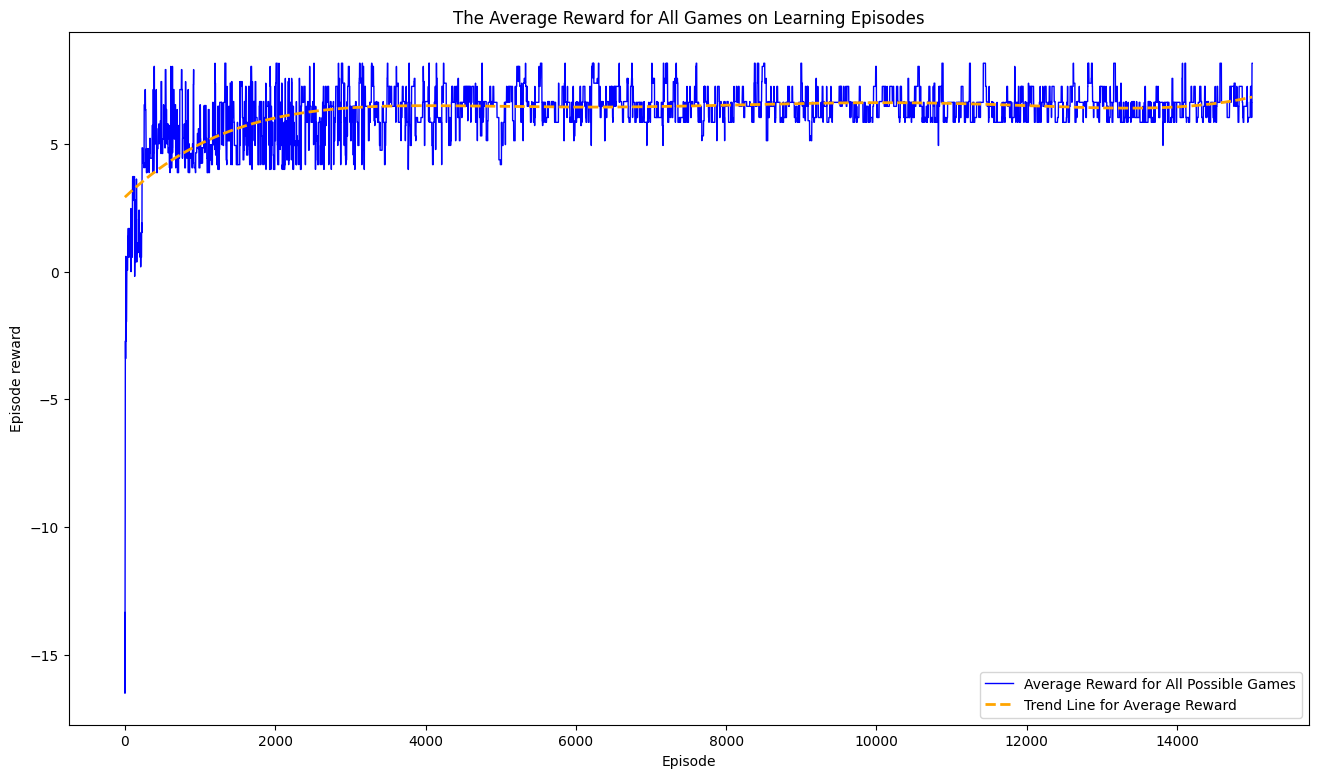

In [ ]:
# @title The Average Reward for All Games on Learning Episodes { vertical-output: true, form-width: "320px" }

x = len(episode_reward_list)
x = np.arange(x)
y_full = [value / len(num_possible) for value in r_full_episode_dump]

full_trend_coefficients = np.polyfit( x, y_full, 5)  # Linear trend with degree 1..5
full_trend_line = np.poly1d(full_trend_coefficients)

plt.figure(figsize=(16, 9))

plt.plot(y_full, linewidth=1, color='blue', label='Average Reward for All Possible Games')  # Red dashed line
plt.plot(x, full_trend_line(x), linewidth=2, color='orange', linestyle='--', label='Trend Line for Average Reward')  # Yellow dashed line

plt.xlabel('Episode')
plt.ylabel('Episode reward')
title = 'The Average Reward for All Games on Learning Episodes'
plt.title(title)
plt.legend()

# Saving files
if save == True:
  title = title.replace(" ", "-")
  dpi = 300 # dpi for saving to files plots
  # Filename
  file_name = 'stat_' + title + '_dpi-' + str(dpi) + '.png' # Filename
  #print(file_name)
  file_path = exp_full_folder_path + file_name
  # Save plots to file
  plt.savefig(file_path, dpi=dpi, bbox_inches='tight')
  print('The plot is saved!')

The plot is saved!


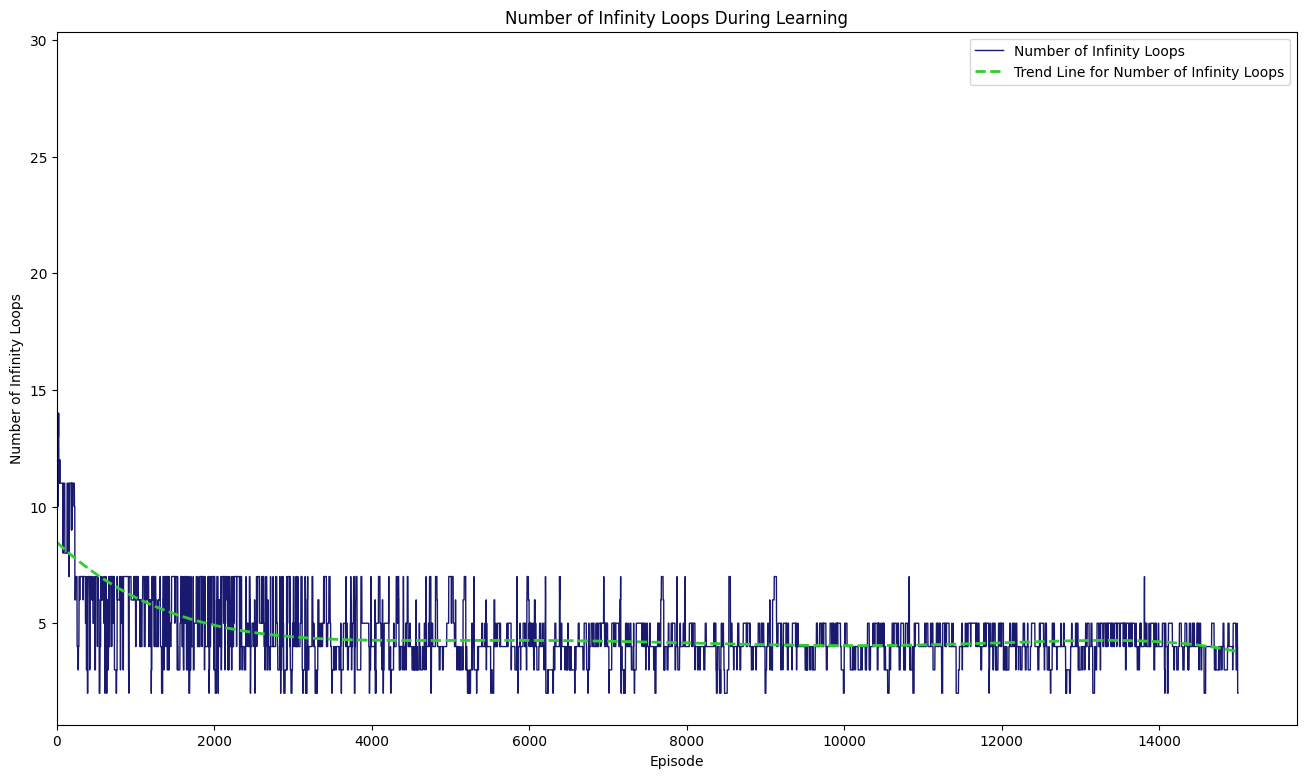

In [ ]:
# @title Number of Infinity Loops During Learning { vertical-output: true, form-width: "480px" }

x = len(num_infinity_list)
x = np.arange(x)
y = num_infinity_list

full_trend_coefficients = np.polyfit( x, y, 5)  # Linear trend with degree 1..5
full_trend_line = np.poly1d(full_trend_coefficients)

plt.figure(figsize=(16, 9))

plt.plot(y, linewidth=1, color='midnightblue', label='Number of Infinity Loops')  # Red dashed line
plt.plot(x, full_trend_line(x), linewidth=2, color='limegreen', linestyle='--', label='Trend Line for Number of Infinity Loops')  # Yellow dashed line

plt.xlim(0, )

plt.xlabel('Episode')
plt.ylabel('Number of Infinity Loops')
title = 'Number of Infinity Loops During Learning'
plt.title(title)
plt.legend()

# Saving files
if save == True:
  title = title.replace(" ", "-")
  dpi = 300 # dpi for saving to files plots
  # Filename
  file_name = 'stat_' + title + '_dpi-' + str(dpi) + '.png' # Filename
  #print(file_name)
  file_path = exp_full_folder_path + file_name
  # Save plots to file
  plt.savefig(file_path, dpi=dpi, bbox_inches='tight')
  print('The plot is saved!')

In [ ]:
# @title Average Rewards for Learning Episodes without Infinity Loops { vertical-output: true, form-width: "480px" }

#x = len(num_infinity_list)
print(min(num_infinity_list))
x = np.where(np.array(num_infinity_list) == 0)
print(x)
y = np.array(r_full_episode_dump)[x]
x = tuple(x[0])
y = tuple(y)
print(max(r_full_episode_dump))
r_max = max(y)
print(r_max)

x_max = np.intersect1d(x, np.where(np.array(r_full_episode_dump) == r_max)[0]) #find intesection
print(x_max)
print(f'The first episode with the highest reward without an infinity loop is the number {x_max[0]}')

fig, ax = plt.subplots(figsize=(16, 9))

ax.scatter(x,y)
#ax.plot(x,y)

ax.grid(True, linestyle = 'dashed', color='lightgray')  # Enables the grid
ax.set_axisbelow(True)
ax.minorticks_on()
ax.tick_params(which='minor', length=2, color='gray')  # Adjust length and color

title = 'Average Rewards for Learning Episodes without Infinity Loops'
ax.set_title(title, fontsize=18)
ax.set_xlabel('Episode', fontsize=14)
ax.set_ylabel('Average Episdoe Reward', fontsize=14)

# Add text block below the plot using fig.text()
fig.text(0.1, -0.01, f'The first episode with the highest reward without an infinity loop is the number {x_max[0]}', ha="left", fontsize=14)

# Saving files
if save == True:
  title = title.replace(" ", "-")
  dpi = 300 # dpi for saving to files plots
  # Filename
  file_name = 'stat_' + title + '_dpi-' + str(dpi) + '.png' # Filename
  #print(file_name)
  file_path = exp_full_folder_path + file_name
  # Save plots to file
  fig.savefig(file_path, dpi=dpi, bbox_inches='tight')
  print('The plot is saved!')


2
(array([], dtype=int64),)
261.0


ValueError: ignored

The plot is saved!


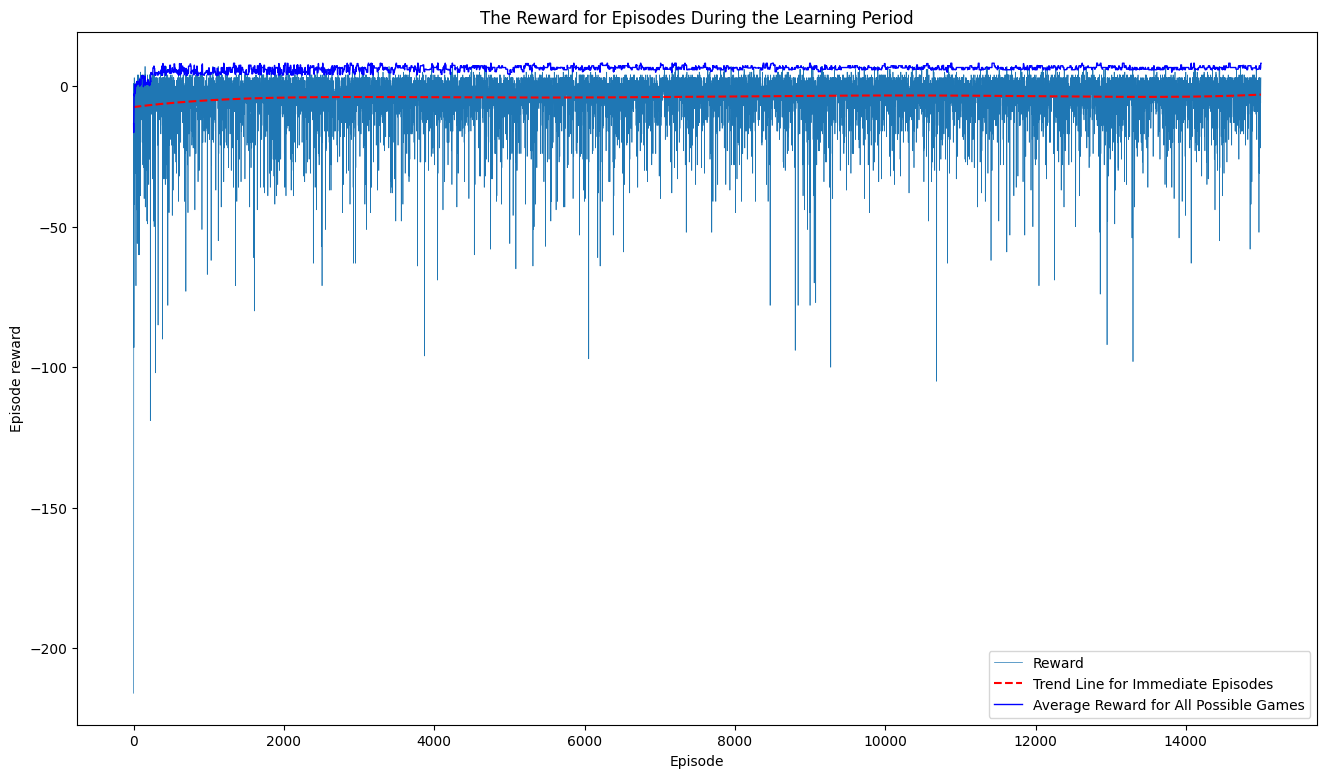

In [ ]:
# @title The Reward for Episodes During the Learning Period { vertical-output: true, form-width: "320px" }

x = len(episode_reward_list)
x = np.arange(x)
y = [value - reward_map.get(EXIT) for value in episode_reward_list]
y_full = [value / len(num_possible) for value in r_full_episode_dump]

im_trend_coefficients = np.polyfit( x, y, 5)  # Linear trend with degree 1..5
im_trend_line = np.poly1d(im_trend_coefficients)

full_trend_coefficients = np.polyfit( x, y_full, 5)  # Linear trend with degree 1..5
full_trend_line = np.poly1d(full_trend_coefficients)

plt.figure(figsize=(16, 9))

plt.plot(y, linewidth=0.5, label='Reward')
plt.plot(x, im_trend_line(x), 'r--', label='Trend Line for Immediate Episodes')  # Red dashed line
plt.plot(y_full, linewidth=1, color='blue', label='Average Reward for All Possible Games')  # Red dashed line
#plt.plot(x, full_trend_line(x), 'y--', label='Trend Line for Average Reward')  # Yellow dashed line


plt.xlabel('Episode')
plt.ylabel('Episode reward')
title = 'The Reward for Episodes During the Learning Period'
plt.title(title)
plt.legend()

# Saving files
if save == True:
  title = title.replace(" ", "-")
  dpi = 300 # dpi for saving to files plots
  # Filename
  file_name = 'stat_' + title + '_dpi-' + str(dpi) + '.png' # Filename
  #print(file_name)
  file_path = exp_full_folder_path + file_name
  # Save plots to file
  plt.savefig(file_path, dpi=dpi, bbox_inches='tight')
  print('The plot is saved!')

The plot is saved!


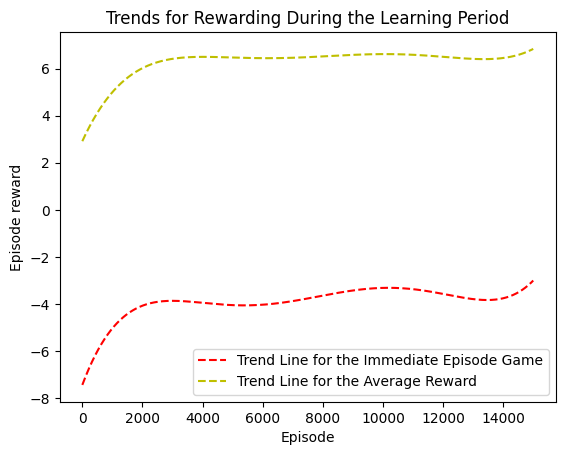

In [ ]:
# @title Trends for Rewarding During the Learning Period{ vertical-output: true, form-width: "320px" }

plt.plot(x, im_trend_line(x), 'r--', label='Trend Line for the Immediate Episode Game')  # Red dashed line
plt.plot(x, full_trend_line(x), 'y--', label='Trend Line for the Average Reward')  # Yellow dashed line
plt.xlabel('Episode')
plt.ylabel('Episode reward')
title = 'Trends for Rewarding During the Learning Period'
plt.title(title)
plt.legend()

# Saving files
if save == True:
  title = title.replace(" ", "-")
  dpi = 300 # dpi for saving to files plots
  # Filename
  file_name = 'stat_' + title + '_dpi-' + str(dpi) + '.png' # Filename
  #print(file_name)
  file_path = exp_full_folder_path + file_name
  # Save plots to file
  plt.savefig(file_path, dpi=dpi, bbox_inches='tight')
  print('The plot is saved!')

The plot is saved!


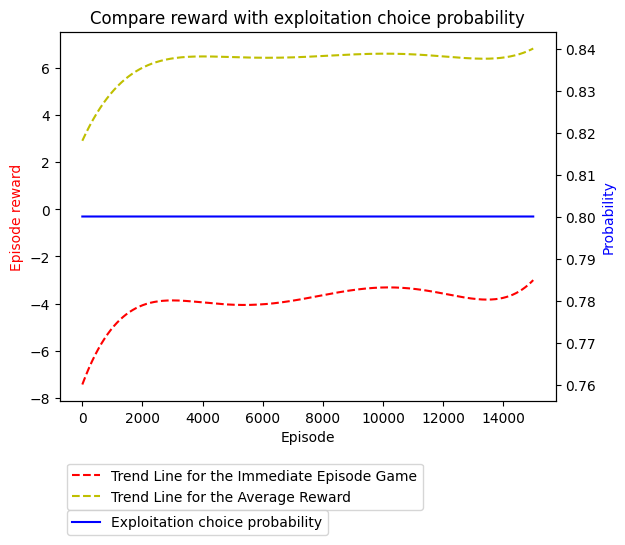

In [ ]:
# @title Compare reward with exploitation choice probability { vertical-output: true, form-width: "640px" }

fig, ax1 = plt.subplots()  # Primary axis

# Create a twin axis sharing the same x-axis
ax2 = ax1.twinx()


ax1.plot(x, im_trend_line(x), 'r--', label='Trend Line for the Immediate Episode Game')
ax1.plot(x, full_trend_line(x), 'y--', label='Trend Line for the Average Reward')
ax1.set_ylabel('Episode reward', color='red')

ax2.plot(x, expl_rate_dump, color='blue', label='Exploitation choice probability')
ax2.set_ylabel('Probability', color='blue')

ax1.set_xlabel('Episode')
title = 'Compare reward with exploitation choice probability'
ax1.set_title(title)

ax1.legend(bbox_to_anchor=(0, -0.15), loc='upper left') # title='Axis 1'
ax2.legend(bbox_to_anchor=(0, -0.275), loc='upper left')


# Saving files
if save == True:
  title = title.replace(" ", "-")
  dpi = 300 # dpi for saving to files plots
  # Filename
  file_name = 'stat_' + title + '_dpi-' + str(dpi) + '.png' # Filename
  #print(file_name)
  file_path = exp_full_folder_path + file_name
  # Save plots to file
  plt.savefig(file_path, dpi=dpi, bbox_inches='tight')
  print('The plot is saved!')

plt.show()

The plot is saved!


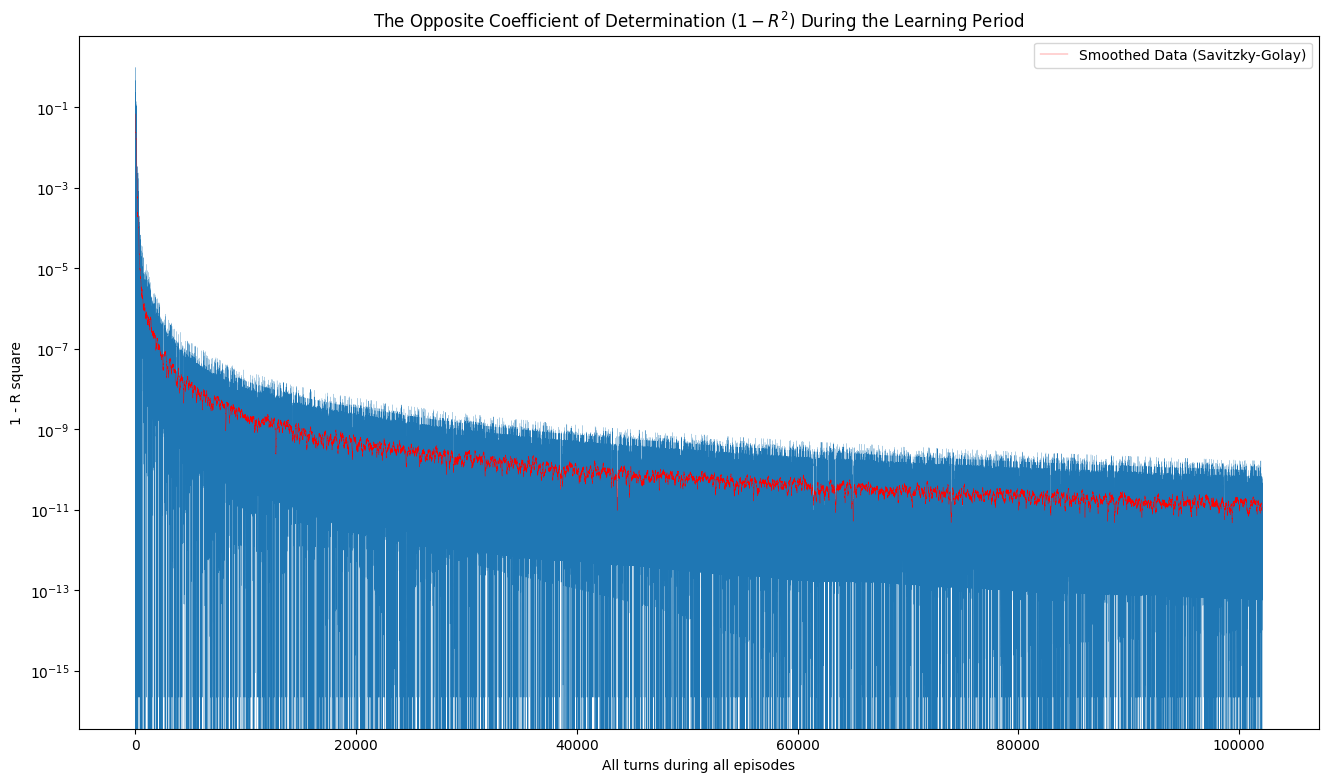

In [ ]:
# @title The Opposite Coefficient of Determination ($1 - R^2$) During the Learning Period { vertical-output: true, form-width: "320px" }

x = len(r_list)
x = np.arange(x)
y = [1-value for value in r_list] # Make from R square to 1 - R square

# Savitzky-Golay filter
y_smoothed_savgol = savgol_filter(y, window_length=100, polyorder=1)  # Adjust parameters as needed

# Polynominal smoothing
#trend_coefficients = np.polyfit(x, y_smoothed_savgol, 5)  # Linear trend with degree 1..5 - but it doesn't work and return NaN
#trend_line = np.poly1d(trend_coefficients)

plt.figure(figsize=(16, 9))

plt.plot(y, linewidth=0.125) # label='1 - R sqare'
plt.plot(x, y_smoothed_savgol, 'r-', linewidth=0.25, label='Smoothed Data (Savitzky-Golay)')
#plt.plot(x, trend_line(x), 'r--', label='Trend Line: polynominal smoothing')  # Red dashed line

plt.yscale('log')
plt.xlabel('All turns during all episodes')
plt.ylabel('1 - R square')

title = 'The Opposite Coefficient of Determination ($1 - R^2$) During the Learning Period'
plt.title(title)
plt.legend()

# Saving files
if save == True:
  title = title.replace(" ", "-")
  dpi = 300 # dpi for saving to files plots
  # Filename
  file_name = 'stat_' + title + '_dpi-' + str(dpi) + '.png' # Filename
  #print(file_name)
  file_path = exp_full_folder_path + file_name
  # Save plots to file
  plt.savefig(file_path, dpi=dpi, bbox_inches='tight')
  print('The plot is saved!')

array([[ -21.,  -21.,  -21., ..., -105.,  -24.,  -21.],
       [ -21.,   -9.,  -15., ..., -120.,  -21.,  -21.],
       [ -21.,   -9.,  -15., ..., -120.,  -21.,  -21.],
       ...,
       [ -15.,   12.,  -15., ...,    8.,    7.,    6.],
       [ -15.,   12.,  -15., ...,    8.,    9.,   10.],
       [ -15.,   12.,  -15., ...,    8.,    9.,   10.]])

500
[0.024093887972877624, 0.14417911836209726, 0.6064690541381428, 0.25521452545899403, 0.5224408529775738, 0.9999999999999998, 0.347379199746695, 0.09068614980625526, 0.961556153884607, 0.834683917782161, 0.47990090884374603, 0.9999999999999998, 0.5842470219975365, 1.0, 0.8757989424169521, 1.0, 1.0, 0.5060768787259082, 1.0, 1.0, 0.9816596086658155, 1.0, 1.0, 1.0, 0.5968085885877935, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7521342226341222, 0.7521342226341222, 0.9831186617463807, 1.0, 0.990479784934766, 1.0, 1.0, 1.0, 0.8779428024484578, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7903515197978849, 0.9999999999999998, 0.8865714212737822, 1.0, 1.0, 0.985949422881686, 0.9851299101429452, 1.0, 1.0, 1.0, 1.0, 0.9851299101429452, 1.0, 1.0, 1.0, 1.0, 0.9849746491115519, 0.5982680238137255, 0.8162426304952833, 0.4695659152633169, 1.0, 0.668939707454046, 0.40585805924094853, 0.5213781703760119, 0.9746641589093148, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8614277184774357, 0.9513213658990909, 0.9441201049981148, 0.8919242761177562, 0.85

<ipython-input-62-08c1fd65dca1>:10: DeprecationWarning: This function is deprecated. Please call randint(-20, 0 + 1) instead
  else: a = np.random.random_integers(-20, 0, size = r_full_list_list.shape[1])


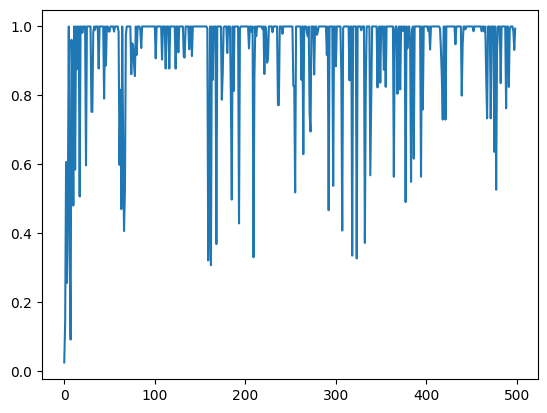

In [ ]:
r_full_list_list = np.array(r_full_list_list)
print(r_full_list_list.shape[0])
a = r_full_list_list[199,:]
b = r_full_list_list[200,:]
rsquared_rewardlist_list = []

for i in range(r_full_list_list.shape[0]-1):
  if i != 0:
    a = r_full_list_list[i-1,:]
  else: a = np.random.random_integers(-20, 0, size = r_full_list_list.shape[1])
  b = r_full_list_list[i,:]

  correlation = np.corrcoef(a, b)[0, 1]
  rsquared_rewardlist = correlation ** 2
  rsquared_rewardlist_list.append(rsquared_rewardlist)

print(rsquared_rewardlist_list)
#plt.scatter(a, b)
one_minus_r = [1-value for value in rsquared_rewardlist_list]
plt.plot(rsquared_rewardlist_list)
#plt.yscale('log')



In [ ]:
class Compot:
  def __init__(self, n, h, w=0):
    self.name = str(n)
    self.hot = bool(h)
    self.whoom = w


In [ ]:
c1 = Compot('Charry', True)
c1.whoom = 5
c1.whoom

5

## Game plot functions

In [ ]:
# -- Define Plot Functions --
bi = board.shape[0] # theoretically it's unnecessary, however it needded to avoid the error

# Fine in the board all positions of GHOST and save all positions to one numpy array
ghost_pos = np.where(board == GHOST)  # Ghost position: Row, Column
ghost_pos = np.asarray(ghost_pos)  # Convert to numpy array and select item with Ghosts

# Define path to icons
icon_path_pacman = "/content/drive/MyDrive/Colab Notebooks/For/pacman_icon_yellow.png"
icon_path_ghost = "/content/drive/MyDrive/Colab Notebooks/For/ghost_icon_red-monstr.png"

#states = []

def f_gameAnimatedDrawing(states, title):

    len_game = len(states) #length of the game: numbers of steps

    bi, bj = board.shape[0], board.shape[1] # Board row and column numbers
    gh_x, gh_y  = ghost_pos [1], ghost_pos [0]  # Ghost X and Y positions

    fig, ax = plt.subplots()     # Create a figure and axis

    f_gameBoard(bi, bj, ax=ax, title=title)  # Plot a game board. Loop through each cell and set color based on its value
    f_staticIcon(gh_x, gh_y, icon=icon_path_ghost, zoom=0.05, ax=ax) # Draw Ghosts
    f_animatedPacman(len_game, fig, ax, pause = 0.1) # Drawing animation Pacman

    if save == True:
          title = title.replace(" ", "-")
          dpi = 150 # dpi for saving to files plots
          # Filename
          file_name = title + '_dpi-' + str(dpi) + '.png' # Filename
          #print(file_name)
          file_path = exp_full_folder_path + file_name
          # Save plots to file
          fig.savefig(file_path, dpi=dpi, bbox_inches='tight')
          print('The plot is saved!')

    # Display result with IPython.display to be ready for animation
    clear_output(wait=True)
    display(fig)


def f_gameTrackDrawing(states, title):
    len_game = len(states) #length of the game: numbers of steps

    bi = board.shape[0] # Board row numbers
    bj = board.shape[1] # Board column numbers

    #p_x = pacman_pos[1] # Pacman X position
    #p_y = pacman_pos[0] # Pacman Y position

    gh_x = ghost_pos [1] # Ghost X position
    gh_y = ghost_pos [0] # Ghost X position

    fig, ax = plt.subplots()     # Create a figure and axis

    f_gameBoard(bi, bj, ax=ax, title=title)  # Plot a game board. Loop through each cell and set color based on its value
    #f_staticIcon(gh_x, gh_y, icon=icon_path_ghost, zoom=0.05, ax=ax) #Ghosts

    track_x = []
    track_y = []
    for s in range(len_game):
        track_pos = np.where(num_board == states[s])  # Track point position True, other False
        track_pos = np.asarray(track_pos) # Track point position: Row, Column

        rnd = np.random.permutation([-1,1])[0]
        track_x.append(track_pos[1] + 0.5 + s*0.01)
        track_y.append(board.shape[0] - track_pos[0] - 0.5 + rnd*s*0.01)  #

    plt.plot(track_x, track_y, 'ko-')

    # Display result with IPython.display to be ready for animation
    #display(fig)


# function for drawing game board
def f_gameBoard(bi, bj, ax=None, title="Pacman Board"):
    # Loop through each cell and set color based on its value
    for i in range(bi):
        for j in range(bj):
            cell_value = board[i, j]
            color = color_map.get(cell_value, "gray")  # Default color for unknown values
            ax.fill([j, j+1, j+1, j], [bi-i, bi-i, bi-(i+1), bi-(i+1)], color)

    # Set axis limits and labels
    ax.set_xlim(0, board.shape[1])
    ax.set_ylim(0, board.shape[0])
    ax.set_xticks([]) # set axess without empty ticks
    ax.set_yticks([]) # set axess without empty ticks
    ax.set_title(title)
    ax.set_aspect('equal') # set aspect ratio for units during x and y axes

    return ax

# function for drawing Icons with several position. Approporiate for both Pacman and Ghosts
def f_staticIcon(i_x, i_y, icon=None, zoom=1, ax=None):

    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(icon)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(i_x, i_y) # Convert inputs to arrays with at least one dimension.
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(
            im,
            (x0+0.5, bi-y0-0.5),
            xycoords='data',
            frameon=False
            )
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

# function for drawing animated Pacman
def f_animatedPacman(len_game, fig, ax, pause = 0.1):

    for i in range(len_game,):

        pacman_pos = np.where(num_board == states[i])  # Pacman position Trew, other False
        pacman_pos = np.asarray(pacman_pos) # Pacman position: Row, Column

        p_x, p_y = pacman_pos[1], pacman_pos[0] # Pacman X and Y positions

        f_staticIcon(p_x, p_y, icon=icon_path_pacman, zoom=0.05, ax=ax) #Pacman

        #Drawing
        clear_output(wait=True) # Wait to clear the previous output to avoid displaying multiple plots

        display(fig) # Display result with IPython.display to be ready for animation
        plt.pause(0.1) # Pause for a short time to create an animation effect

# Test: execute draw game
# f_gameAnimatedDrawing()

print('Done!')

## Play the Games

In [ ]:
# @title Number of dumped episodes: { vertical-output: true, form-width: "320px" }

print(f'Number of dumped episodes: \033[1m\033[33m{len(Q_dump)}\033[0m')

Number of dumped episodes: 15001


In [ ]:
#@title Select Q-table from the learning dump { vertical-output: true, form-width: "480px" }

#@markdown ####Select dumped Q-table:
SELCTEDDUMP = 10 #@param{type:'integer'}
Q_sel = Q_dump[SELCTEDDUMP]


Print_Qtable = False #@param {type: 'boolean'}

if Print_Qtable == True:
  print(Q_sel)

### Draw All Games' Plots

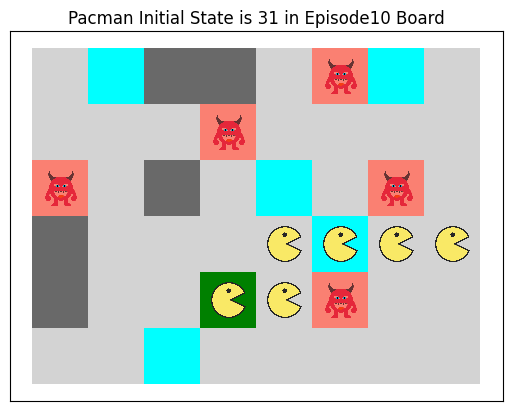

The plot is saved!


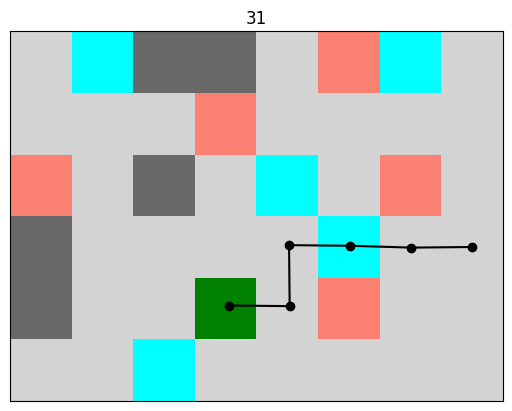

In [ ]:
#@title Play the random game with selected Q-table { vertical-output: true, form-width: "480px" }

s = np.random.permutation(num_possible)[0] # initial states
init_s = s.copy()
print('Intital state: ', init_s)

l = 0
states = []

maxTurns = 20 # Maximum number of turns in the game

while True:

  states.append(s)

  sij = find_pos_by_value(num_board,s) # find position in board
  si = sij[0] # i of current position
  sj = sij[1] # j of current position
  idx = np.where(num_target_board[si,sj,:] == -1, False, True)
  possible_Q = Q_sel[si,sj,idx]
  j = possible_Q.argmax()
  possible_k = np.arange(ACTIONNUMBER)[idx]
  k = possible_k[j] # target state numbe
  t = num_target_board[si,sj,k]

  print('Step: ',l, '  State:', s,  'Syeps: ', states )

  if s == terminalState or l > maxTurns:
    break
  s = t
  l = l+1

title = 'Pacman Initial State is ' + str(init_s) + ' in Episode' + str(SELCTEDDUMP) + ' Board'
f_gameAnimatedDrawing(states, title)

title = 'Pacman Initial State is ' + str(init_s) + ' Track'
f_gameTrackDrawing(states, str(init_s))

# Saving files
if save == True:
  title = title.replace(" ", "-")
  dpi = 150 # dpi for saving to files plots
  # Filename
  file_name = title + '_dpi-' + str(dpi) + '.png' # Filename
  #print(file_name)
  file_path = exp_full_folder_path + file_name
  # Save plots to file
  plt.savefig(file_path, dpi=dpi, bbox_inches='tight')
  print('The plot is saved!')

Game:  0 	Game Reward: -21.0 	Episode Reward: -21.0 	Steps:  21 	State: 8 	States in track:  [0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8]
Game:  1 	Game Reward: -21.0 	Episode Reward: -42.0 	Steps:  21 	State: 14 	States in track:  [4, 12, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14]
Game:  2 	Game Reward: -15.0 	Episode Reward: -57.0 	Steps:  21 	State: 13 	States in track:  [7, 6, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13, 14, 13]
Game:  3 	Game Reward: -21.0 	Episode Reward: -78.0 	Steps:  21 	State: 0 	States in track:  [8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0]
Game:  4 	Game Reward: -21.0 	Episode Reward: -99.0 	Steps:  21 	State: 8 	States in track:  [9, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8]
Game:  5 	Game Reward: -21.0 	Episode Reward: -120.0 	Steps:  21 	State: 0 	States in track:  [10, 9, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8, 0, 8

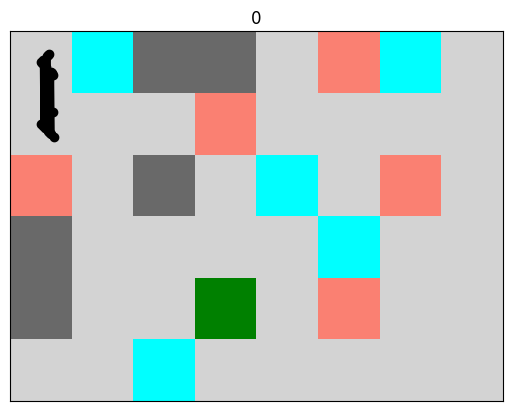

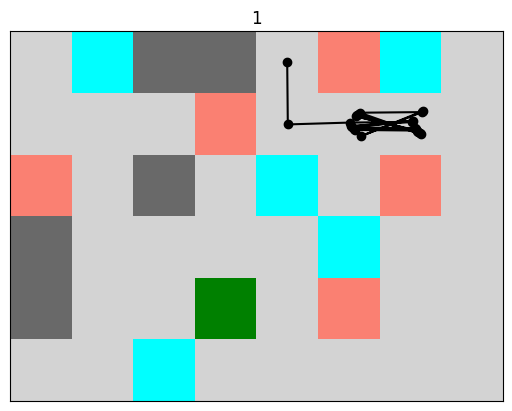

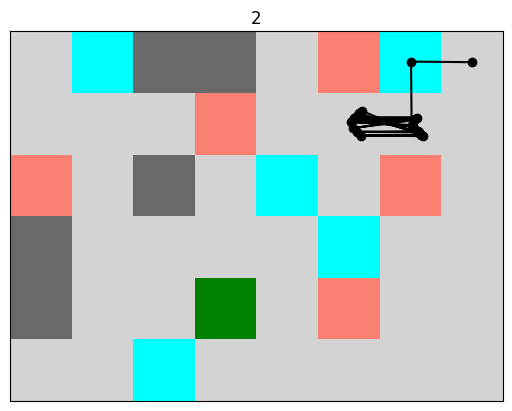

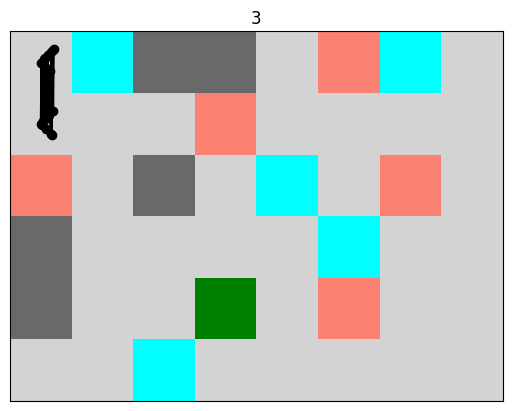

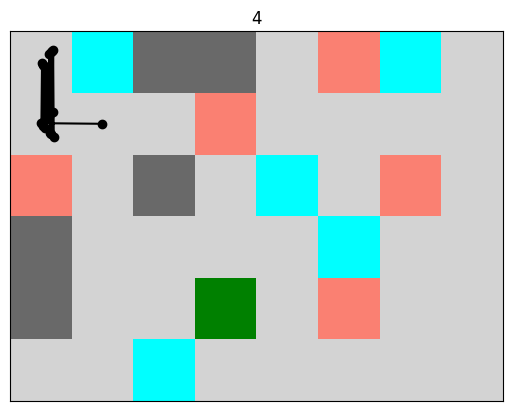

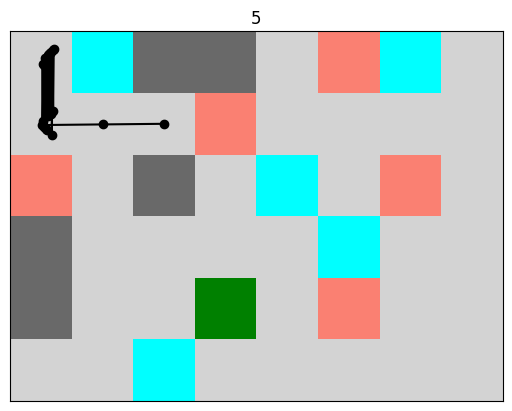

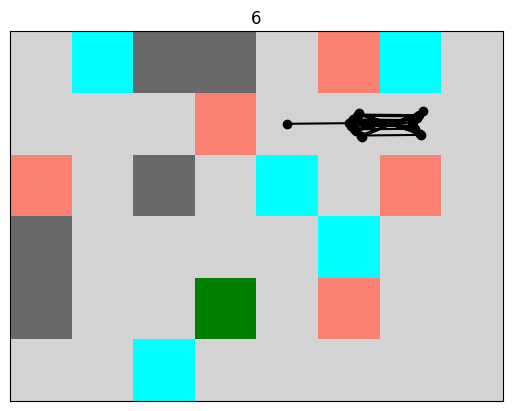

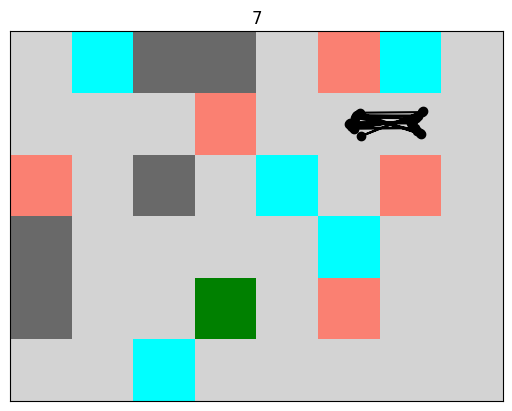

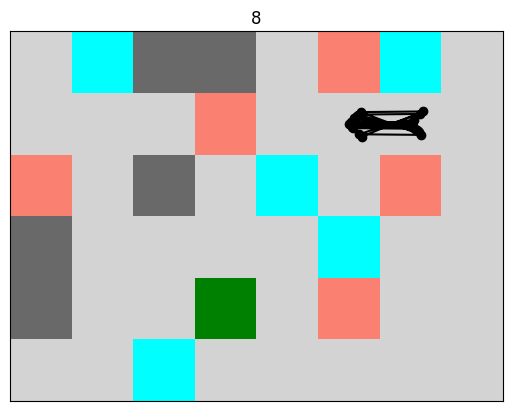

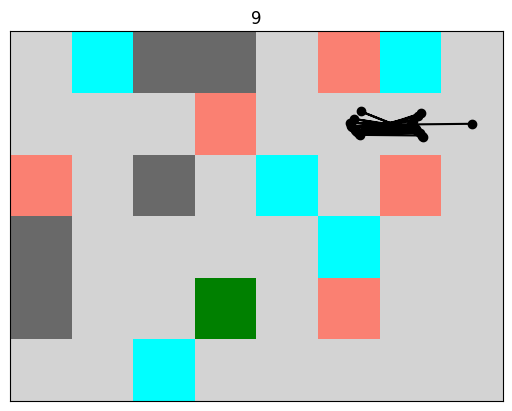

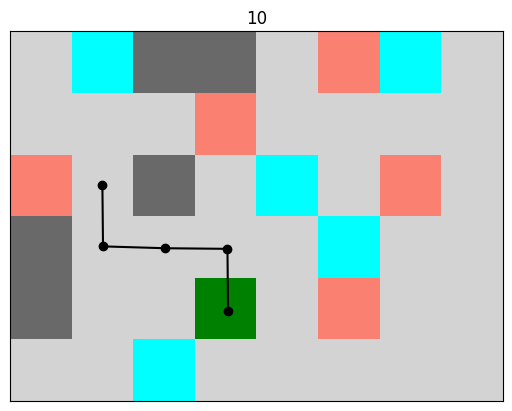

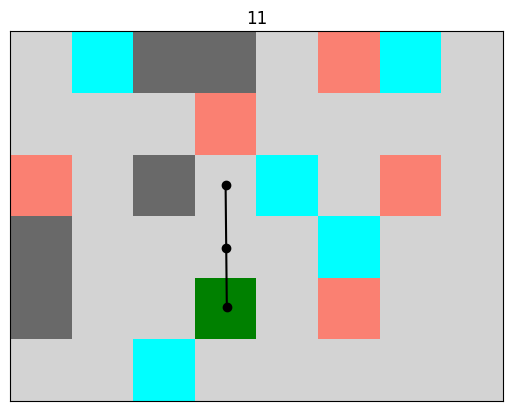

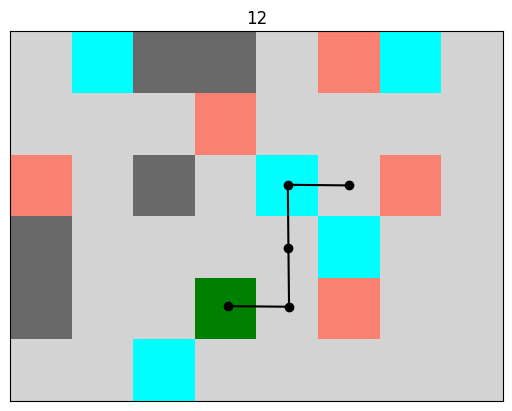

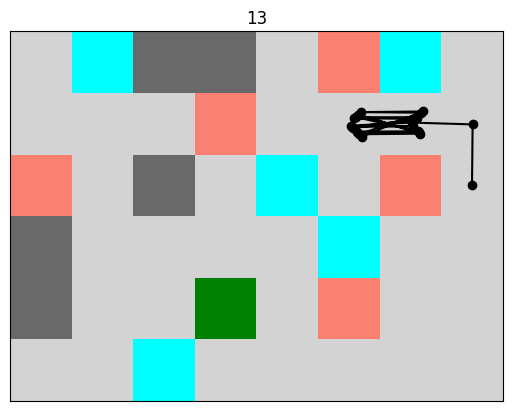

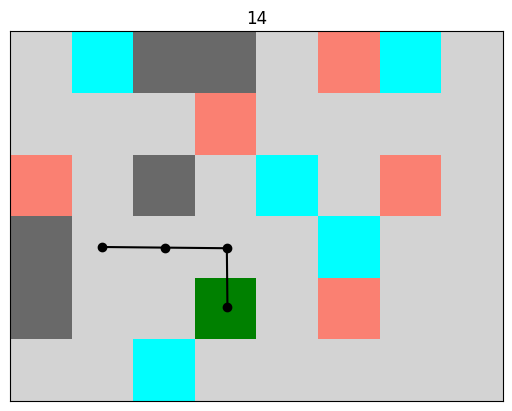

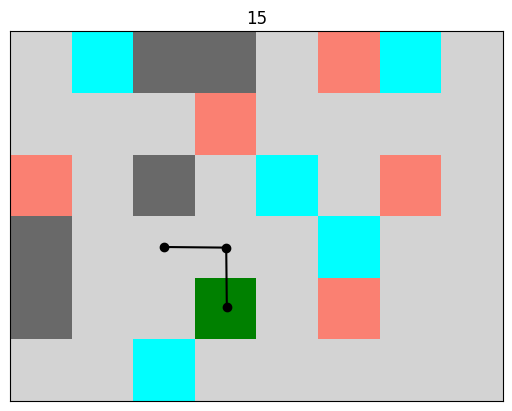

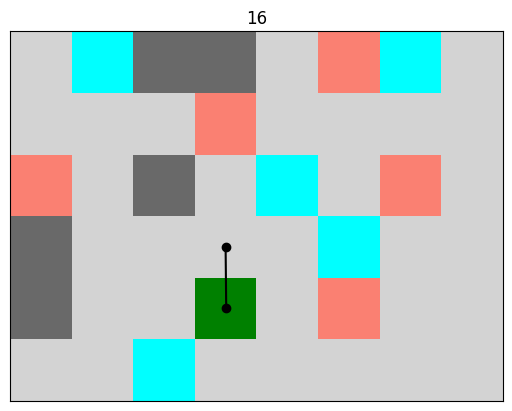

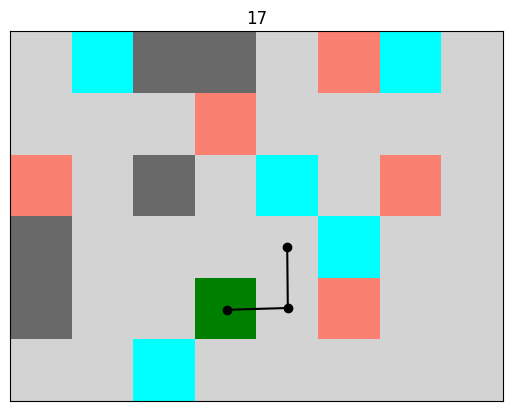

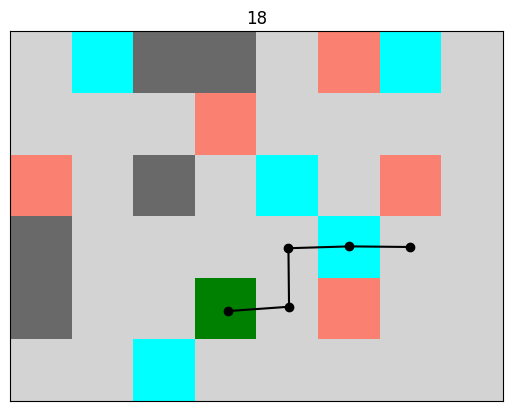

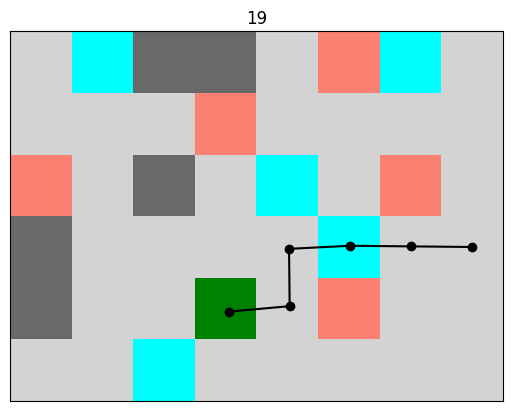

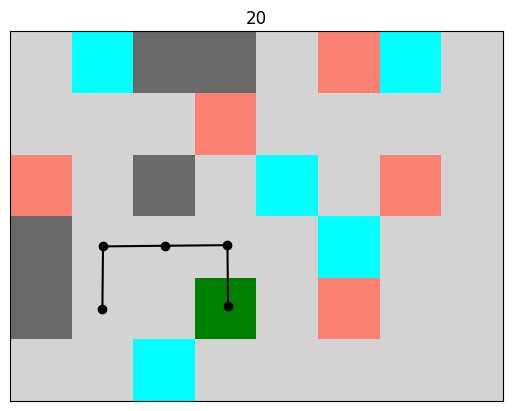

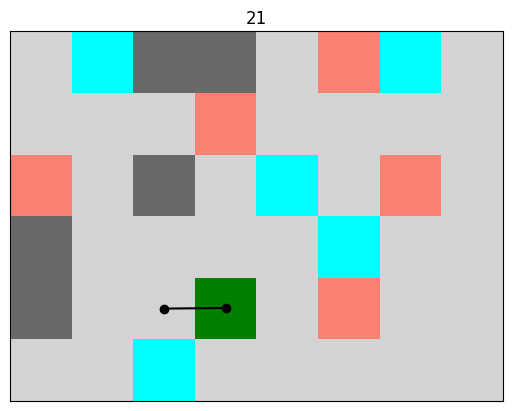

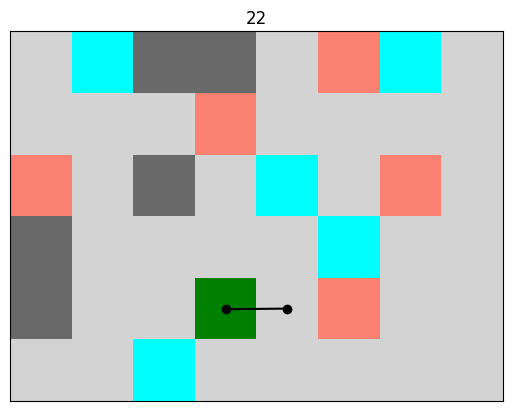

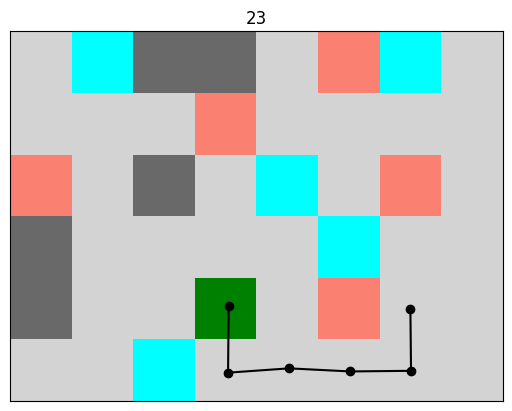

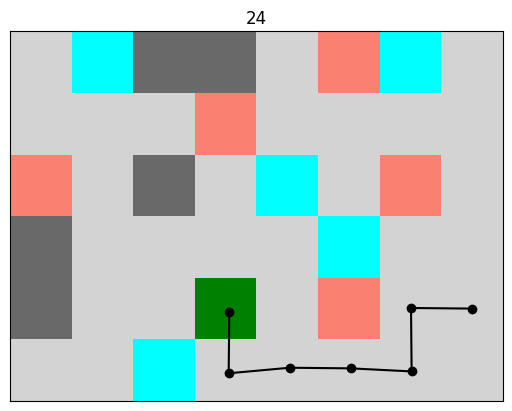

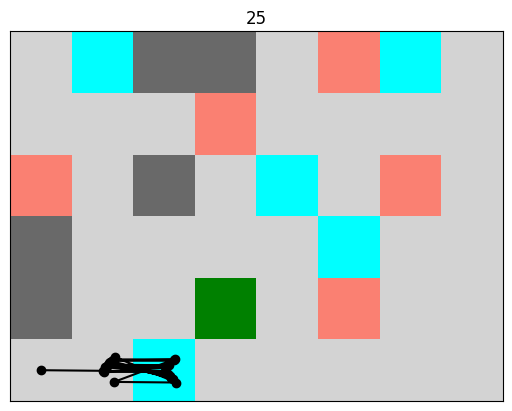

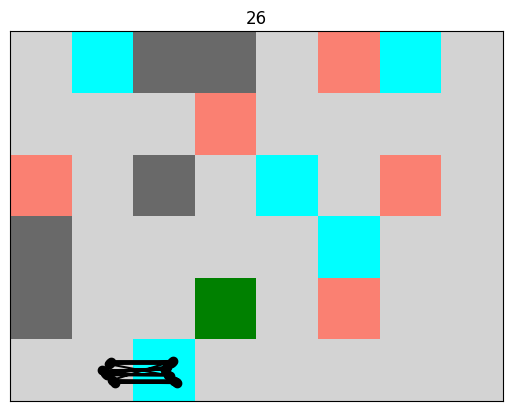

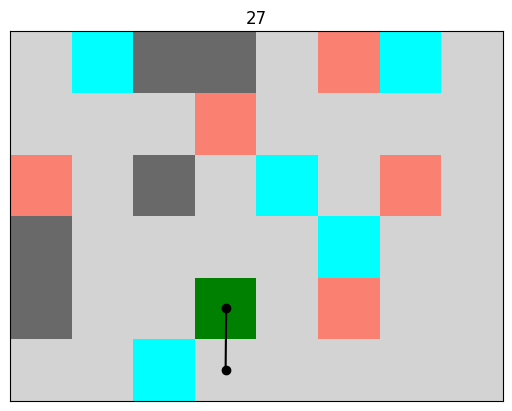

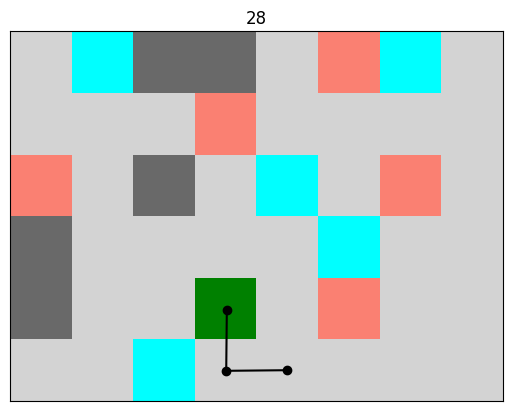

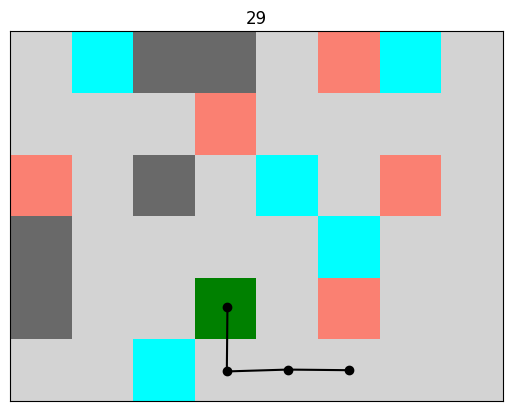

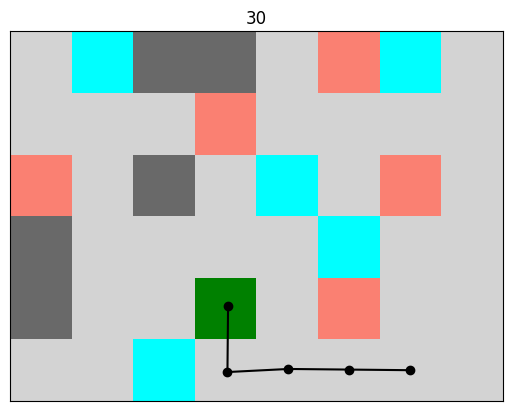

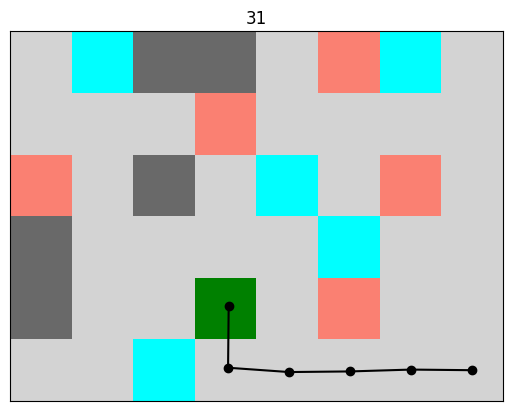

In [ ]:
#@title Play All Possible Games in the Selected Episode { vertical-output: true, form-width: "480px" }

file_path_list = f_playEpisode(Q_sel, pr=True, pl=True, sh=True, save=True)['file_path_list']


grid width: 7, grid height: 5, grid cells 35


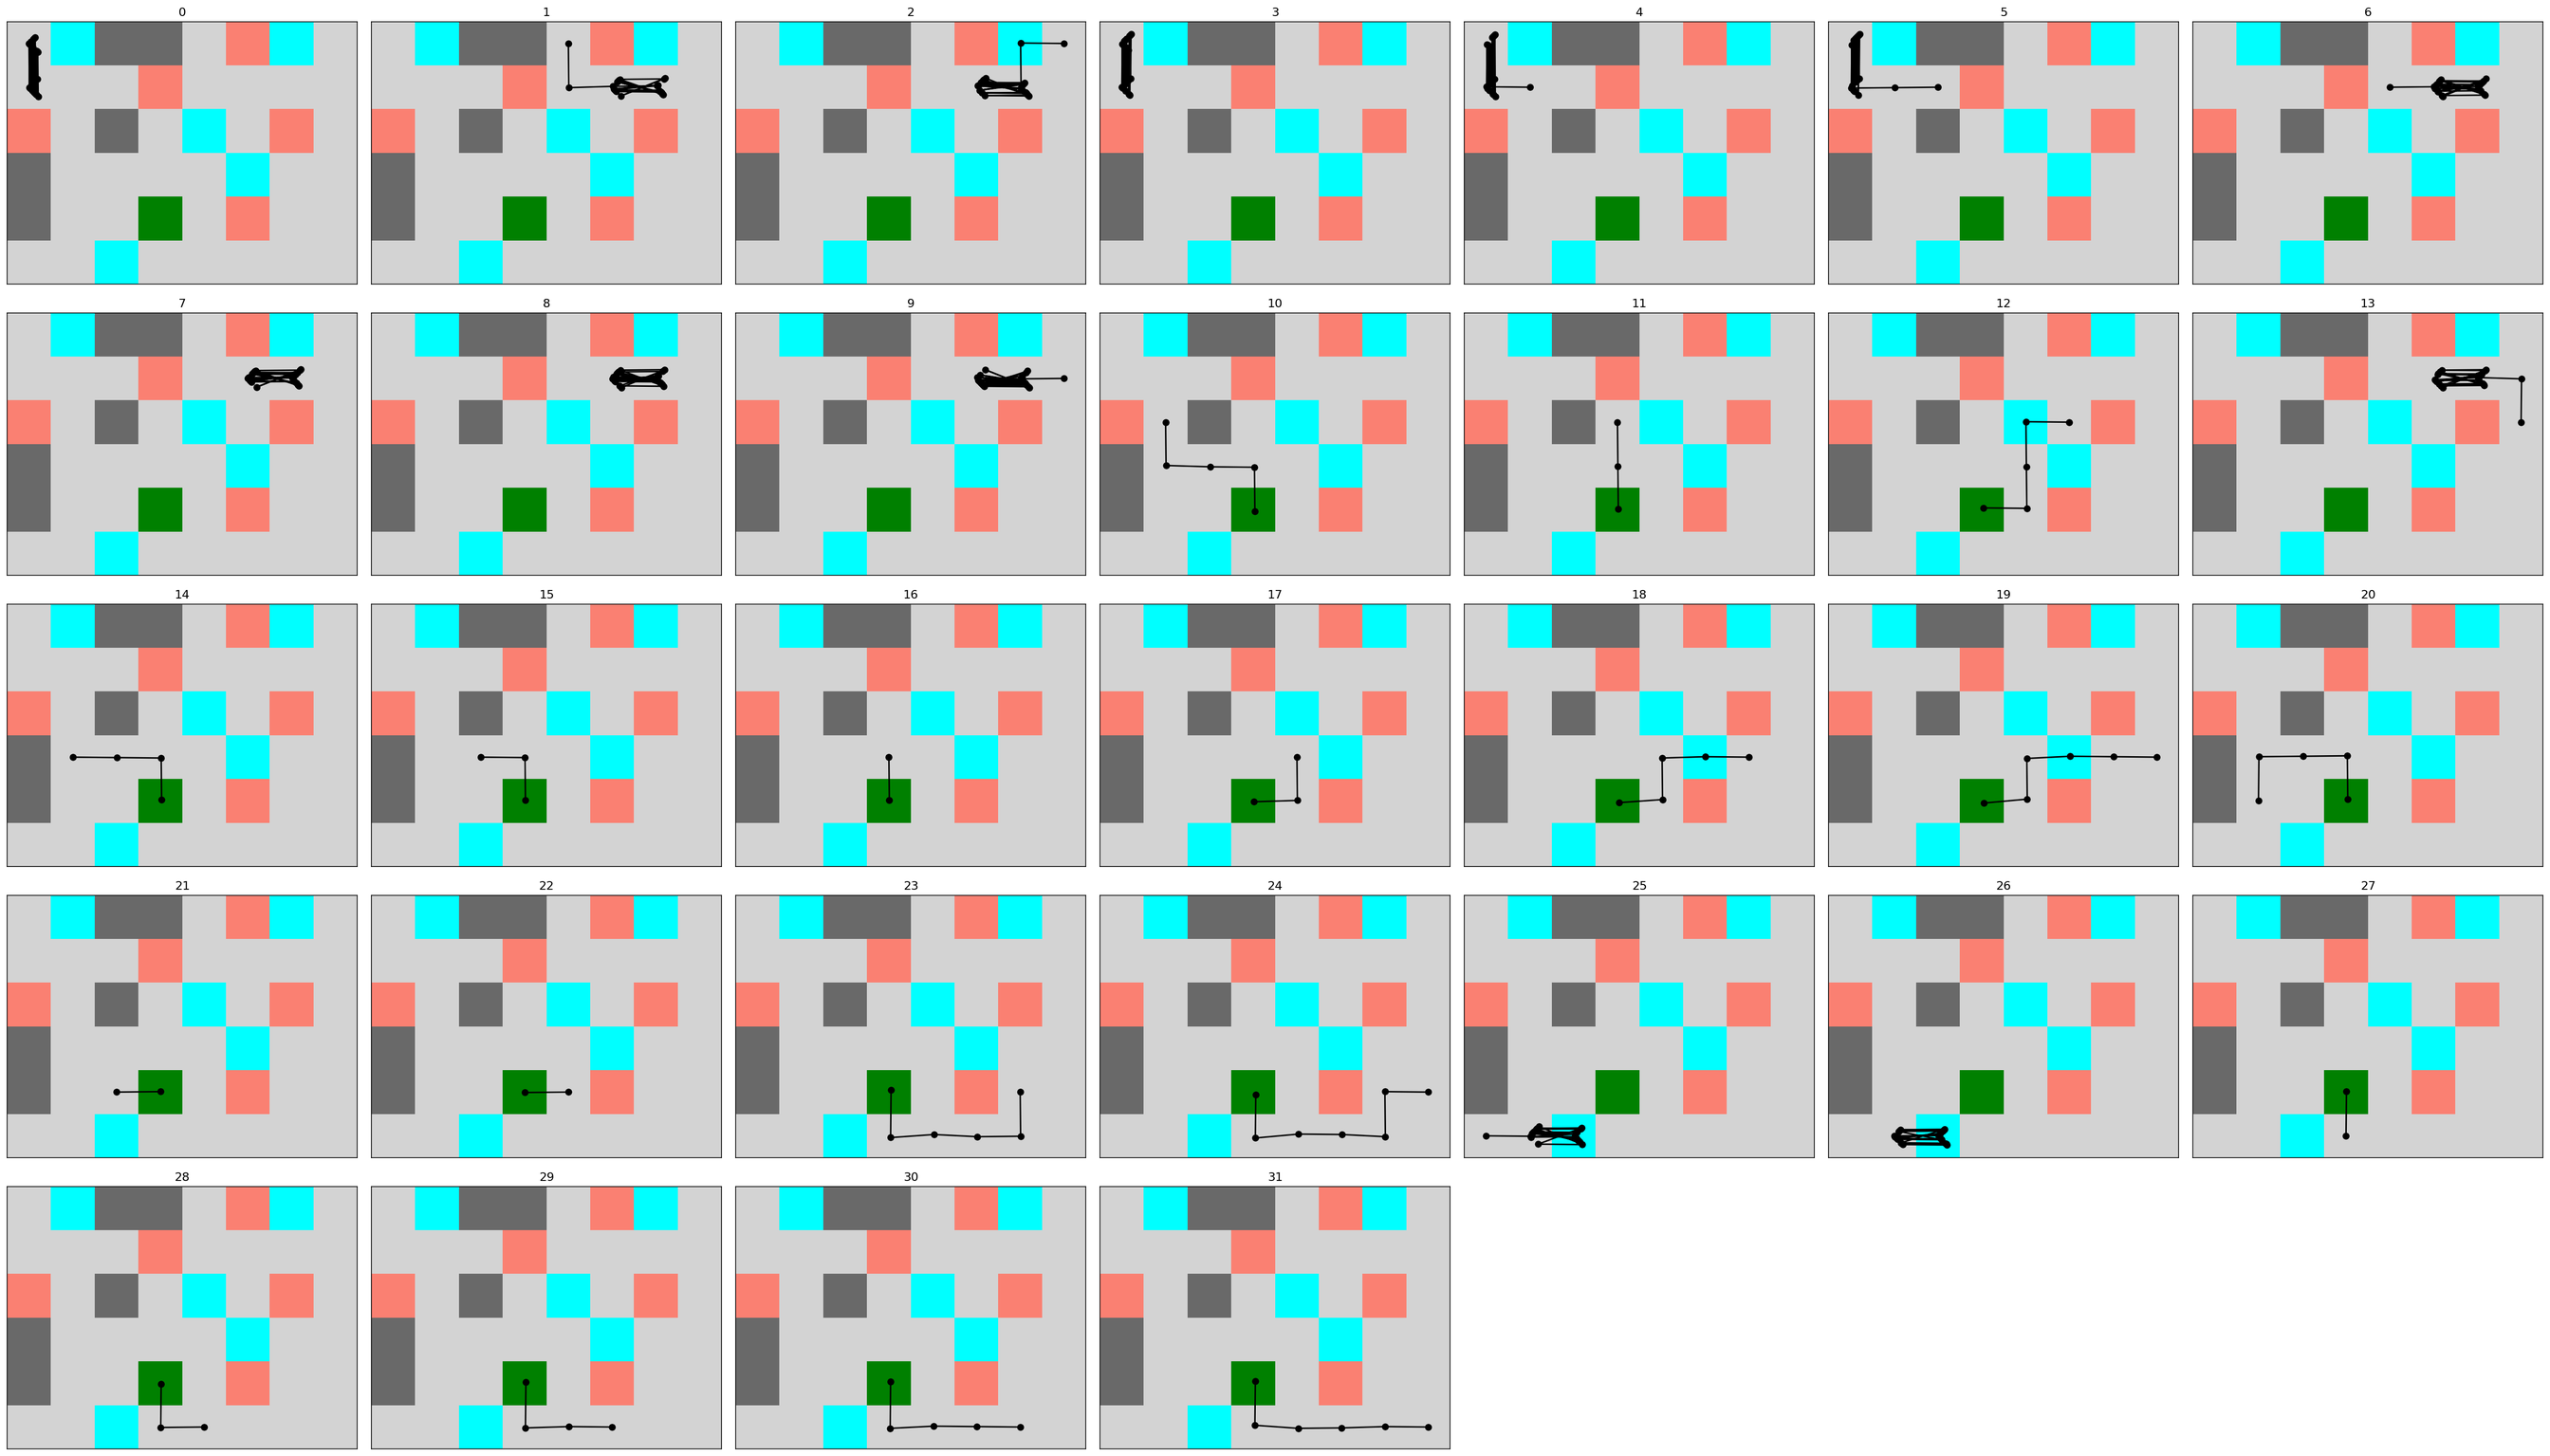

The plot is saved!


In [ ]:
#@title Game Matrix { vertical-output: true, form-width: "480px" }

grid_width = 7  # Number of images per row
grid_height = int(np.ceil(len(file_path_list) / grid_width))  # Number of rows
print(f'grid width: {grid_width}, grid height: {grid_height}, grid cells {grid_width*grid_height}')


# Load images and create a grid
images = [Image.open(file_path_list[i]) for i in range(len(file_path_list))]
widths, heights = zip(*(i.size for i in images))

downscale = 2
width = int(np.floor(widths[0] / downscale))
height = int(np.floor(heights[0] / downscale))

images = [images[i].resize((width,height), resample=Image.LANCZOS) for i in range(len(images))]  # Maintains aspect ratio

# Calculate the total size of the grid

total_width = grid_width * width
max_height = grid_height * height

grid_image = Image.new('RGB', (total_width, max_height), color='white')

# Paste images onto the grid
x_offset = 0
y_offset = 0
for i, image in enumerate(images):
    x = i % grid_width
    y = int(np.floor(i / grid_width))
    x_offset = x * width
    y_offset = y * height
    grid_image.paste(image, (x_offset, y_offset))

display(grid_image)
# Save the grid

# Saving files

if save == True:
    title = 'Game Matrix'
    title = title.replace(" ", "-")
    dpi = 150 # dpi for saving to files plots
    # Filename
    file_name = title + '_E-' + str(SELCTEDDUMP) + '.png' # Filename
    #print(file_name)
    file_path = exp_full_folder_path + file_name
    # Save plots to file
    grid_image.save(file_path)
    print('The plot is saved!')

